In [1]:
import sys
sys.path.append('..')
from dezero import *

In [2]:
def _dot_var(v, verbose=False):
    dot_var = '{} [label="{}", color=orange, style=filled]\n'
    
    name = '' if v.name is None else v.name
    if verbose and v.data is not None:
        if v.name is not None:
            name += ': '
        name += str(v.shape) + ' ' + str(v.dtype)
    return dot_var.format(id(v), name)

In [3]:
import numpy as np
x = Variable(np.random.randn(2, 3))
x.name = 'x'
print(_dot_var(x))
print(_dot_var(x, verbose=True))

139665495688960 [label="x", color=orange, style=filled]

139665495688960 [label="x: (2, 3) float64", color=orange, style=filled]



In [4]:
def _dot_func(f):
    dot_func = '{} [label="{}", color=lightblue, style=filled, shape=box]\n'
    txt = dot_func.format(id(f), f.__class__.__name__)
    
    dot_edge = '{} -> {}\n'
    for x in f.inputs:
        txt += dot_edge.format(id(x), id(f))
    for y in f.outputs:
        txt += dot_edge.format(id(f), id(y))
    return txt

In [5]:
x0 = Variable(np.array(1.0))
x1 = Variable(np.array(1.0))
y = x0 + x1
txt = _dot_func(y.creator)
print(txt)

139664464897456 [label="Add", color=lightblue, style=filled, shape=box]
139664464897600 -> 139664464897456
139664464898416 -> 139664464897456
139664464897456 -> 139664464921520



In [6]:
from dezero.utils import plot_dot_graph

In [7]:
def goldstein(x, y):
    return (1 + (x + y + 1) ** 2 * (19 - 14 * x + 3 * x ** 2 - 14 * y + 6 * x * y + 3 * y ** 2)) * \
        (30 +(2 * x - 3 * y) ** 2 * (18 - 32 * x + 12 * x ** 2 + 48 * y - 36 * x * y + 27 * y ** 2))

In [8]:
x = Variable(np.array(1.0))
y = Variable(np.array(1.0))
z = goldstein(x, y)
z.backward()

In [9]:
x.name = 'x'
y.name = 'y'
z.name = 'z'

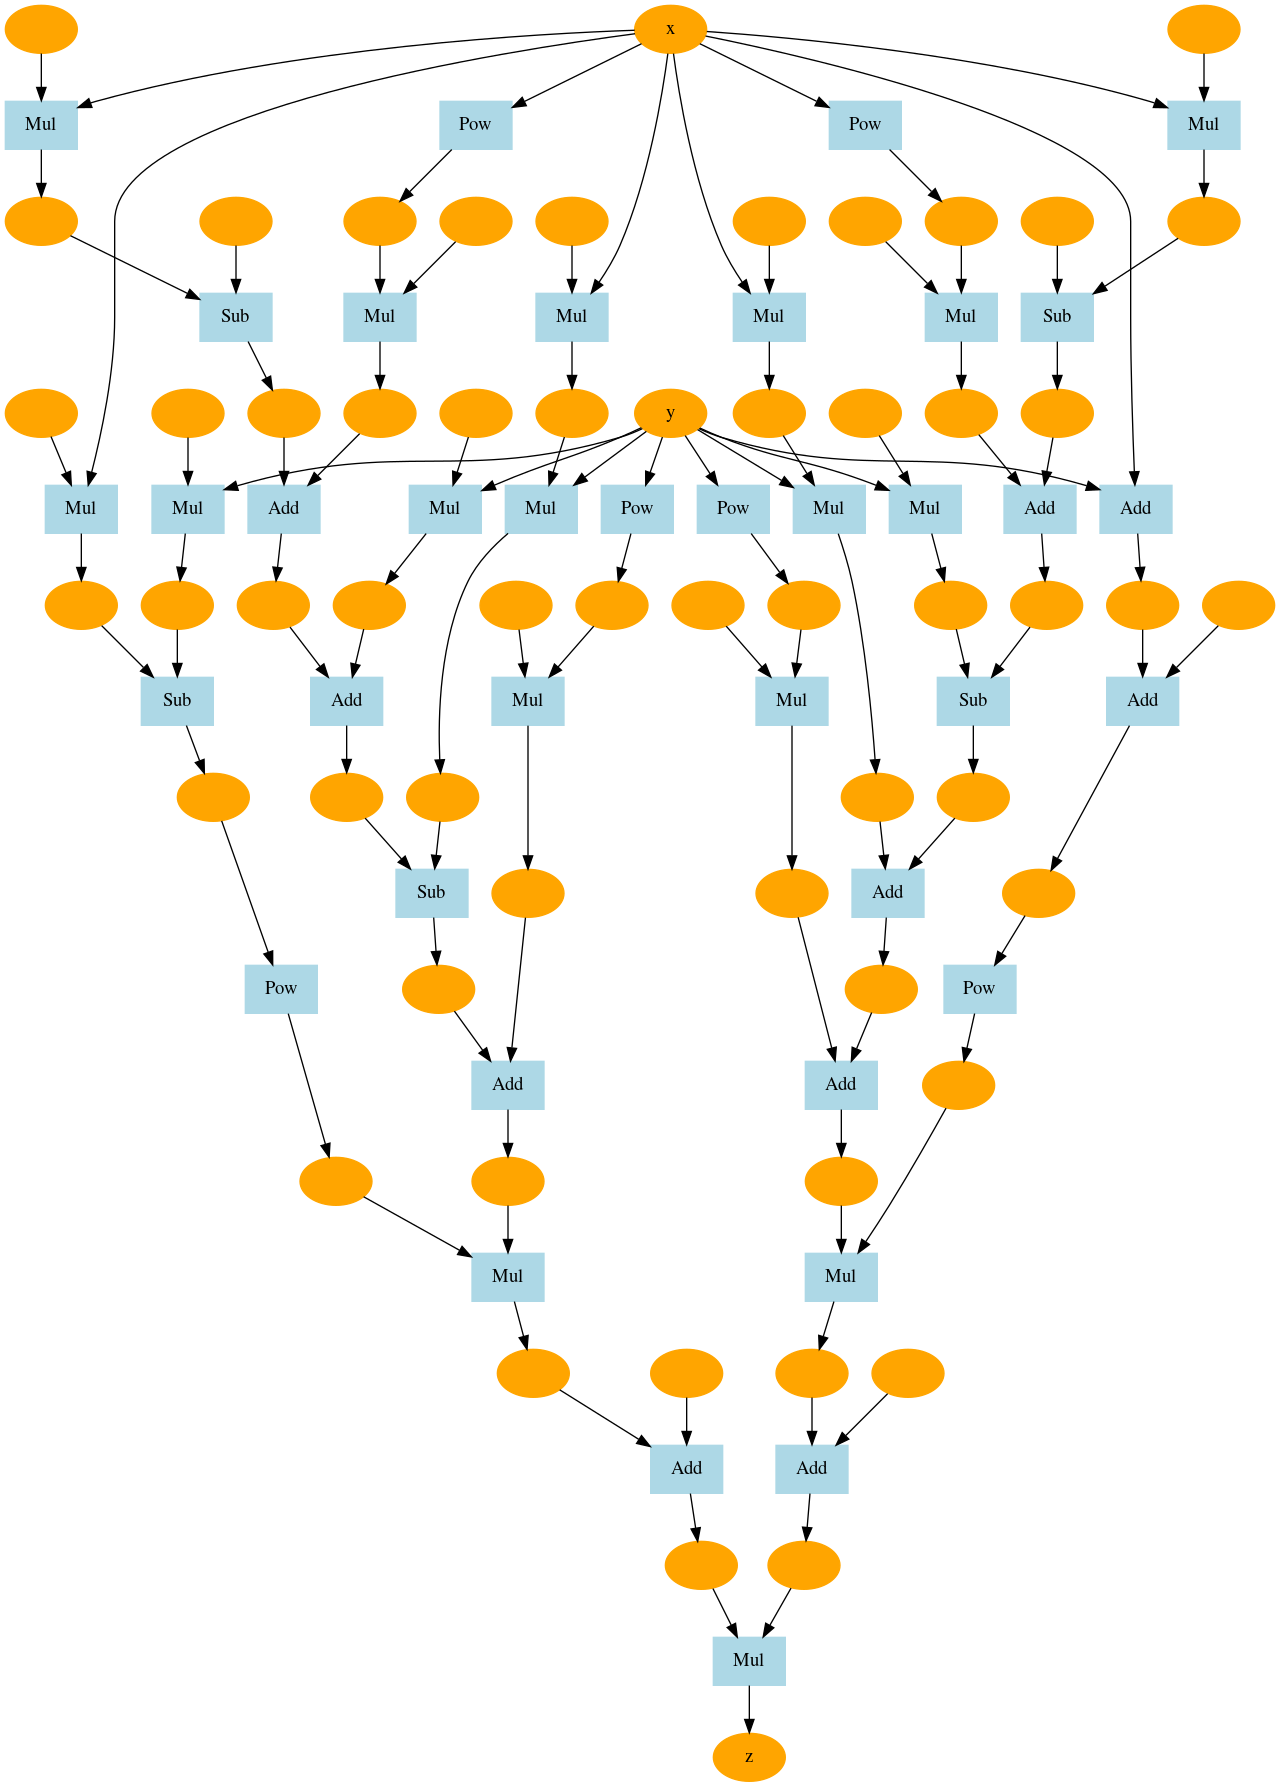

In [10]:
plot_dot_graph(z, verbose=False, to_file='goldstein.png')